<a href="https://colab.research.google.com/github/fernandosagastume/SPLABS/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Headless Model
#Fernando José Sagastume
#Carnet: 17004989
#Sección: A

%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp36-none-any.whl size=7012 sha256=dbf4004e23a99eca1e595fbc4a1bd7aef299b441caa5506427f9473720b37258
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures


In [0]:
class_names = ['naruto','sasuke']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'naruto')  
train_im_dir = os.path.join(train_dir, 'sasuke')  
validation_ca_dir = os.path.join(validation_dir, 'naruto') 
validation_im_dir = os.path.join(validation_dir, 'sasuke')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
IMAGE_SIZE = (224, 224)
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return

In [0]:
img_dir = os.path.realpath('Images/')

In [12]:
queries = ['ninja','9 tail fox','anime','Jinchuriki','hokage']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='naruto '+ query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=naruto ninja&source=lnms&tbm=isch
Total Time : 0:00:04.219910
Invalid image:  96.jpg cannot identify image file '/content/Images/96.jpg'
Invalid image:  49.jpg cannot write mode RGBA as JPEG
Invalid image:  1.jpg cannot write mode RGBA as JPEG
Invalid image:  34.jpg cannot write mode RGBA as JPEG
Invalid image:  86.jpg cannot identify image file '/content/Images/86.jpg'
Invalid image:  64.jpg cannot identify image file '/content/Images/64.jpg'
Invalid image:  58.jpg cannot write mode P as JPEG
Invalid image:  21.jpg cannot write mode RGBA as JPEG
Invalid image:  99.jpg cannot write mode RGBA as JPEG
Invalid image:  28.jpg cannot identify image file '/content/Images/28.jpg'
Invalid image:  76.jpg cannot identify image file '/content/Images/76.jpg'
Invalid image:  62.jpg cannot write mode RGBA as JPEG
Invalid image:  32.jpg cannot identify image file '/content/Images/32.jpg'
Invalid image:  9.jpg cannot identify image file '/content/Images/9.jpg'
Invalid

In [13]:
queries = ['ninja','sharingan','anime','curse mark','taka']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='sasuke '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=sasuke ninja&source=lnms&tbm=isch
Total Time : 0:00:04.825505
Invalid image:  22.jpg cannot write mode RGBA as JPEG
Invalid image:  88.jpg cannot identify image file '/content/Images/88.jpg'
Invalid image:  84.jpg cannot identify image file '/content/Images/84.jpg'
Invalid image:  52.jpg cannot write mode P as JPEG
Invalid image:  25.jpg cannot write mode RGBA as JPEG
Invalid image:  49.jpg cannot write mode RGBA as JPEG
Invalid image:  74.jpg cannot write mode P as JPEG
Invalid image:  56.jpg cannot write mode RGBA as JPEG
Invalid image:  64.jpg cannot write mode RGBA as JPEG
Invalid image:  77.jpg cannot write mode P as JPEG
Invalid image:  51.jpg cannot write mode P as JPEG
Invalid image:  54.jpg cannot identify image file '/content/Images/54.jpg'
Invalid image:  81.jpg cannot write mode RGBA as JPEG
Invalid image:  16.jpg cannot identify image file '/content/Images/16.jpg'
Invalid image:  18.jpg cannot write mode RGBA as JPEG
Invalid image:  72.jpg

In [14]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Naruto images:', len(os.listdir(train_ca_dir)))
print('total training Sasuke images:', len(os.listdir(train_im_dir)))

print('total validation Naruto images:', len(os.listdir(validation_ca_dir)))
print('total validation Sasuke images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Naruto images: 336
total training Sasuke images: 341
total validation Naruto images: 59
total validation Sasuke images: 51
--
Total training images: 677
Total validation images: 110


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [16]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 677 images belonging to 2 classes.


In [17]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 110 images belonging to 2 classes.


In [0]:
image_batch, labels_batch = next(train_data_gen)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

In [22]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [0]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [28]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['web site', 'comic book', 'fountain', 'crash helmet', 'mask',
       'comic book', 'comic book', 'comic book', 'ski', 'rubber eraser',
       'rubber eraser', 'ski mask', 'mask', 'comic book', 'mask',
       'digital watch', 'stage', 'ski mask', 'pencil box', 'crash helmet',
       'sarong', 'ski', 'comic book', 'comic book', 'comic book', 'mask',
       'mask', 'flute', 'comic book', 'bobsled', 'comic book',
       'comic book'], dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

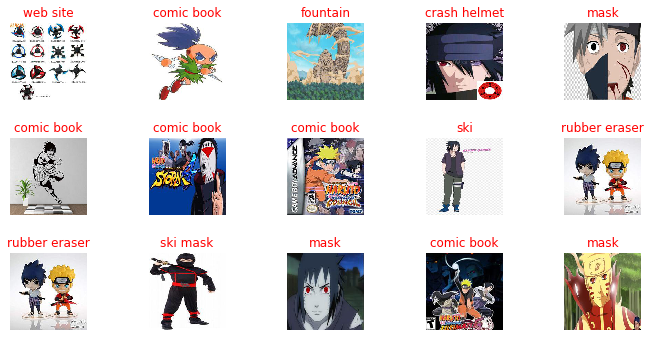

In [31]:
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [34]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

In [36]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


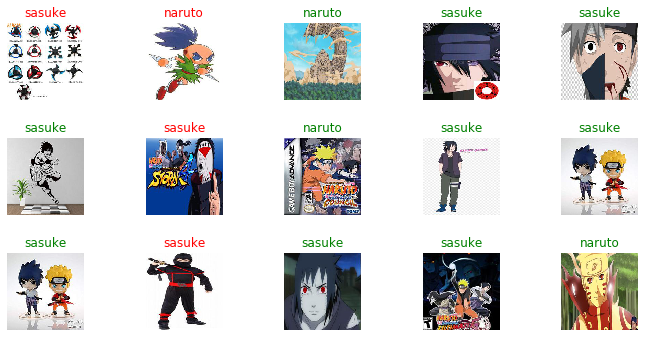

In [37]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 43s 9s/step - loss: 0.9904 - accuracy: 0.6438 - val_loss: 1.1116 - val_accuracy: 0.6909
Epoch 2/5
5/5 [==============================] - 38s 8s/step - loss: 0.8198 - accuracy: 0.7625 - val_loss: 0.6267 - val_accuracy: 0.7818
Epoch 3/5
5/5 [==============================] - 35s 7s/step - loss: 0.3560 - accuracy: 0.8797 - val_loss: 0.4803 - val_accuracy: 0.7818
Epoch 4/5
5/5 [==============================] - 35s 7s/step - loss: 0.3216 - accuracy: 0.8496 - val_loss: 0.5354 - val_accuracy: 0.7364
Epoch 5/5
5/5 [==============================] - 38s 8s/step - loss: 0.3212 - accuracy: 0.8875 - val_loss: 0.6451 - val_accuracy: 0.7545


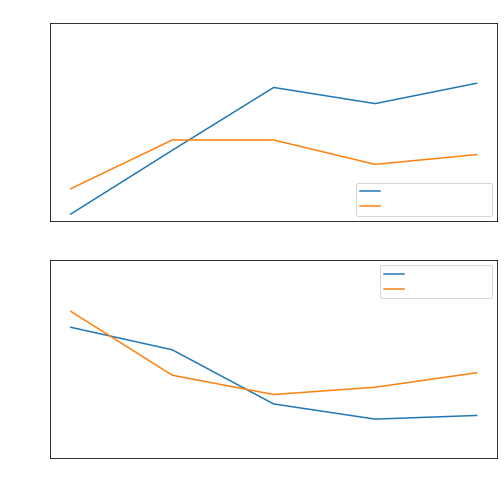

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

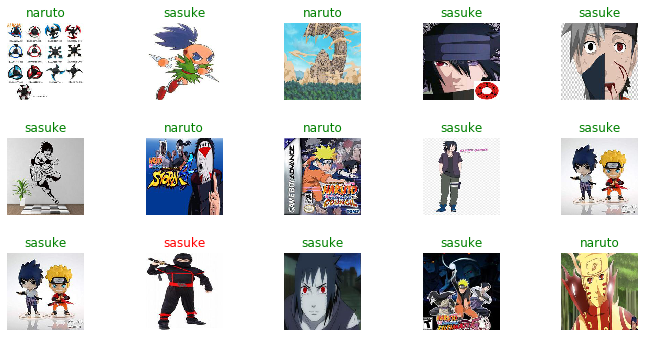

In [41]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)